In [ ]:
from nsepy import get_history
import datetime
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nsepy.derivatives import get_expiry_date

In [ ]:
expiry = max(get_expiry_date(year=2019, month=12))
print (expiry)

In [78]:
nifty_fut = get_history(symbol="RELIANCE",
        start=expiry,
        end=expiry,
        futures=True,
        expiry_date=expiry)

niftydata = nifty_fut

nifty_opt = get_history(symbol="RELIANCE",
        start=expiry,
        end=expiry,
        option_type='CE',
        strike_price=1200,
        expiry_date=expiry)

optiondata = nifty_opt

y = expiry + datetime.timedelta(days=1)

In [79]:
print (niftydata.tail())
print (optiondata.tail())

              Symbol      Expiry   Open   High     Low  Close    Last  \
Date                                                                    
2017-12-28  RELIANCE  2017-12-28  924.9  934.9  919.15  925.1  924.15   

            Settle Price  Number of Contracts      Turnover  Open Interest  \
Date                                                                         
2017-12-28         924.2                27447  2.538598e+10       10578000   

            Change in OI  Underlying  
Date                                  
2017-12-28     -14539000       924.2  
Empty DataFrame
Columns: [Symbol, Expiry, Option Type, Strike Price, Open, High, Low, Close, Last, Settle Price, Number of Contracts, Turnover, Premium Turnover, Open Interest, Change in OI, Underlying]
Index: []


In [80]:
for x in range (4,13):
    expiry = max(get_expiry_date(year=2018, month=x))
    nifty_fut = get_history(symbol="RELIANCE",
        start=y,
        end=expiry,
        futures=True,
        expiry_date=expiry)

    niftydata = niftydata.append(nifty_fut)
        
    high = nifty_fut[['Close']].max()
    low = nifty_fut[['Close']].min()
    Diff = high - low
    high = int((round(high/20)*20)+100)
    low = int((round(low/20)*20)-100)
    
    for z in range (low, high, 20):
        nifty_opt = get_history(symbol="RELIANCE",
        start=y,
        end=expiry,
        option_type='CE',
        strike_price=z,
        expiry_date=expiry)
        optiondata = optiondata.append(nifty_opt)
        nifty_opt = get_history(symbol="RELIANCE",
        start=y,
        end=expiry,
        option_type='PE',
        strike_price=z,
        expiry_date=expiry)
        optiondata = optiondata.append(nifty_opt)
    y = expiry + datetime.timedelta(days=1) 

1080
780
Close    92.85
dtype: float64
4
1100
820
Close    83.25
dtype: float64
5
1120
840
Close    93.85
dtype: float64
6
1240
860
Close    166.75
dtype: float64
7
1420
1040
Close    182.6
dtype: float64
8
1380
1120
Close    65.5
dtype: float64
9
1360
920
Close    234.25
dtype: float64
10
1260
940
Close    121.45
dtype: float64
11
1280
1000
Close    81.5
dtype: float64
12


In [82]:
niftydata.to_excel("RELIANCEfuture2018excel.xls", index=True, encoding='utf8')
optiondata.to_excel("RELIANCEOption2018excel.xls", index=True, encoding='utf8')

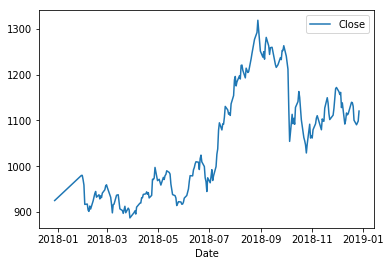

In [83]:
NiftyCF = pd.DataFrame({"Close": niftydata["Close"]})
NiftyCF.plot()

In [85]:
print (NiftyCO.tail())

                Expiry Type  Strike    Last
Date                                       
2018-12-20  2018-12-27   PE  1260.0  132.35
2018-12-21  2018-12-27   PE  1260.0  155.00
2018-12-24  2018-12-27   PE  1260.0  168.95
2018-12-26  2018-12-27   PE  1260.0  180.80
2018-12-27  2018-12-27   PE  1260.0  138.00


In [87]:
NiftyCO = pd.DataFrame({"Expiry": optiondata['Expiry'],
                        "Type": optiondata['Option Type'], 
                        "Strike": optiondata['Strike Price'],
                        "Last": optiondata['Last']})

Opttable = pd.pivot_table(NiftyCO, values ='Last', index =['Date', 'Type', 'Expiry'], 
                         columns =['Strike'], aggfunc = np.sum) 

Opttable = Opttable.join(NiftyCF)
print (Opttable.tail())

              Close
Date               
2018-12-20  1130.90
2018-12-21  1100.45
2018-12-24  1090.55
2018-12-26  1098.60
2018-12-27  1120.50
                            780.0  800.0  820.0  840.0  860.0  880.0  900.0  \
Date       Type Expiry                                                        
2018-12-24 PE   2018-12-27    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-12-26 CE   2018-12-27    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
           PE   2018-12-27    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-12-27 CE   2018-12-27    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
           PE   2018-12-27    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                            920.0  940.0  960.0  ...  1240.0  1260.0  1280.0  \
Date       Type Expiry                           ...                           
2018-12-24 PE   2018-12-27    NaN    NaN    NaN  ...  146.00  168.95     NaN   
2018-12-26 CE   2018-12-27    NaN    NaN    NaN  ...    0.05    0.

In [88]:
Opttable.to_csv("RELIANCEOptionpivot2018.csv", index=True, encoding='utf8')
Opttable.to_excel("RELIANCEOptionpivot2018Excel.xls", index=True, encoding='utf8')

In [139]:
optiontable = pd.read_csv('Optionpivot.csv')

In [140]:
print (optiontable.head())

         Date Type      Expiry  10500.0  10600.0  10700.0  10800.0  10900.0  \
0  2018-12-27   CE  2018-12-27      NaN      NaN      NaN     0.05      NaN   
1  2018-12-28   CE  2019-01-31   467.85   397.40    319.0   249.00   190.00   
2  2018-12-28   PE  2019-01-31    66.45    86.60    109.0   139.00   174.95   
3  2018-12-31   CE  2019-01-31   480.00   401.50    328.3   257.00   194.40   
4  2018-12-31   PE  2019-01-31    67.80    86.95    111.1   140.00   178.20   

   11000.0  11100.0     Nifty  
0      NaN      NaN  10783.65  
1   136.10      NaN  10907.75  
2   222.50      NaN  10907.75  
3   141.10      NaN  10916.85  
4   221.95      NaN  10916.85  


In [142]:
high = high - 200
print (high)
print (low)

10900
10500


In [143]:
for z in range (low, high, 100):
    print (z)
    l1 = z
    l2 = z+100
    l3 = z+200
    bf0 = 'bf'+str(l2)
    bf1 = str(l1)+'.0'
    bf2 = str(l2)+'.0'
    bf3 = str(l3)+'.0'
    optiontable[bf0] = optiontable[bf1]-optiontable[bf2]-optiontable[bf2]+optiontable[bf3]
    print (str(l2)+'Butterfly updated')

10500
10600Butterfly updated
10600
10700Butterfly updated
10700
10800Butterfly updated
10800
10900Butterfly updated


In [144]:
print (optiontable.head())

         Date Type      Expiry  10500.0  10600.0  10700.0  10800.0  10900.0  \
0  2018-12-27   CE  2018-12-27      NaN      NaN      NaN     0.05      NaN   
1  2018-12-28   CE  2019-01-31   467.85   397.40    319.0   249.00   190.00   
2  2018-12-28   PE  2019-01-31    66.45    86.60    109.0   139.00   174.95   
3  2018-12-31   CE  2019-01-31   480.00   401.50    328.3   257.00   194.40   
4  2018-12-31   PE  2019-01-31    67.80    86.95    111.1   140.00   178.20   

   11000.0  11100.0     Nifty  bf10600  bf10700  bf10800  bf10900  
0      NaN      NaN  10783.65      NaN      NaN      NaN      NaN  
1   136.10      NaN  10907.75    -7.95     8.40    11.00     5.10  
2   222.50      NaN  10907.75     2.25     7.60     5.95    11.60  
3   141.10      NaN  10916.85     5.30     1.90     8.70     9.30  
4   221.95      NaN  10916.85     5.00     4.75     9.30     5.55  


In [145]:
optiontable.to_csv("Optionbf.csv", index=True, encoding='utf8')